In [2]:
from permutations import *
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
congress = pd.read_csv('congress_main.csv')
congress['TransactionDate'] = pd.to_datetime(congress['TransactionDate'])
returns = pd.read_csv('returns.csv')
returns.index = returns.Date.astype('datetime64[ns]')
returns.drop('Date', axis=1, inplace=True)
congress.head()

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,Price,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End
0,2018-05-15,2018-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,49.059349,1001.0,15000.0,-1001.0,-15000.0,-3003.0,-45000.0,-24001.5,-305.752120,-20.403858
1,2018-06-13,2018-06-01,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,46.939678,1001.0,15000.0,-1001.0,-15000.0,-4004.0,-60000.0,-32002.0,-319.559072,-21.325242
2,2018-09-14,2018-09-06,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,50.084381,1001.0,15000.0,-1001.0,-15000.0,-5005.0,-75000.0,-40002.5,-299.494566,-19.986271
3,2019-03-06,2019-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,43.876400,1001.0,15000.0,-1001.0,-15000.0,-7007.0,-105000.0,-56003.5,-341.869433,-22.814087
4,2019-06-14,2019-06-03,VMC,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,123.395256,250001.0,500000.0,250001.0,500000.0,241993.0,380000.0,310996.5,4052.019634,2026.017921


In [5]:
thou=npermis(congress,1000)

In [8]:
thous=pd.concat(thou)
thous.head()

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,...,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End,Variance
0,2019-01-09,2018-12-28,SCHW,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001-15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,84007.0,260000.0,172003.5,-391.052152,-26.096214,281.572804
1,NaN,2019-09-12,IHRT,A. Mitchell Jr. McConnell,Purchase,15001.0,R,Senate,15001-50000,NaN,...,15001.0,50000.0,-15001.0,-50000.0,-15001.0,-50000.0,-32500.5,-3465.003391,-1039.570317,32.454885
2,2023-05-26,2022-08-05,LLY,A. Mitchell Jr. McConnell,Sale,1001.0,R,Senate,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,-33033.0,-495000.0,-264016.5,50.483508,3.368933,15100.530936
3,2020-05-27,2020-04-07,CARR,A. Mitchell Jr. McConnell,Sale,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,1001.0,15000.0,506919.0,255000.0,380959.5,1028.446895,68.631689,56.870847
4,2020-08-13,2019-12-11,JPM,A. Mitchell Jr. McConnell,Sale,1001.0,R,Senate,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,9009.0,135000.0,72004.5,125.235077,8.357354,2365.642536


In [12]:
avg_variances = thous.groupby('Representative')['Variance'].mean()
std_errors = thous.groupby('Representative')['Variance'].apply(lambda x: np.std(x) / np.sqrt(len(x)))
std_ev=thous.groupby('Representative')['Variance'].apply(lambda x: np.std(x))

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Average Variance': avg_variances, 'Standard Error': std_errors, 'Standard Deviation': std_ev})

# Display the results
result_df.head()

,Average Variance,Standard Error,Standard Deviation
Representative,,,
A. Mitchell Jr. McConnell,5998.220014,617.419950,89472.651122
Abigail Spanberger,7927.605336,1732.679554,54792.138450
Adam B. Schiff,4539.063660,594.178014,26572.448605
Adam Kinzinger,8005.584704,1333.539191,183815.692243
Alan S. Lowenthal,7352.779822,165.039021,148809.929473


In [31]:
fishy={}
for index in result_df.index:
    avg_variance = result_df.loc[index,'Average Variance'] 
    std_dev = result_df.loc[index,'Standard Deviation']
    
    # Filter congress dataframe for this representative
    trades = congress[congress['Representative'] == index]

    # Filter for high variance trades 
    outlier_trades = trades[trades['Variance'] > (avg_variance + 2*std_dev)]
    fishy[index]=outlier_trades

fishy

{'A. Mitchell Jr. McConnell': Empty DataFrame
 Columns: [ReportDate, TransactionDate, Ticker, Representative, Transaction, Amount, Party, House, Range, Sentiment, Price, Low_End, High_End, Adjusted_Low_End, Adjusted_High_End, Running_Portfolio_Low_End, Running_Portfolio_High_End, Est_Portfolio_Value, Shares_High_End, Shares_Low_End, Variance]
 Index: []
 
 [0 rows x 21 columns],
 'Abigail Spanberger': Empty DataFrame
 Columns: [ReportDate, TransactionDate, Ticker, Representative, Transaction, Amount, Party, House, Range, Sentiment, Price, Low_End, High_End, Adjusted_Low_End, Adjusted_High_End, Running_Portfolio_Low_End, Running_Portfolio_High_End, Est_Portfolio_Value, Shares_High_End, Shares_Low_End, Variance]
 Index: []
 
 [0 rows x 21 columns],
 'Adam B. Schiff': Empty DataFrame
 Columns: [ReportDate, TransactionDate, Ticker, Representative, Transaction, Amount, Party, House, Range, Sentiment, Price, Low_End, High_End, Adjusted_Low_End, Adjusted_High_End, Running_Portfolio_Low_End, R

In [35]:
fishy2={}
for index in result_df.index:
    avg_variance = result_df.loc[index,'Average Variance'] 
    std_error = result_df.loc[index,'Standard Error']
    
    # Filter congress dataframe for this representative
    trades = congress[congress['Representative'] == index]

    # Filter for high variance trades 
    outlier_trades = trades[trades['Variance'] > (avg_variance + 2*std_error)]
    fishy2[index]=outlier_trades

fishy2

{'A. Mitchell Jr. McConnell': Empty DataFrame
 Columns: [ReportDate, TransactionDate, Ticker, Representative, Transaction, Amount, Party, House, Range, Sentiment, Price, Low_End, High_End, Adjusted_Low_End, Adjusted_High_End, Running_Portfolio_Low_End, Running_Portfolio_High_End, Est_Portfolio_Value, Shares_High_End, Shares_Low_End, Variance]
 Index: []
 
 [0 rows x 21 columns],
 'Abigail Spanberger': Empty DataFrame
 Columns: [ReportDate, TransactionDate, Ticker, Representative, Transaction, Amount, Party, House, Range, Sentiment, Price, Low_End, High_End, Adjusted_Low_End, Adjusted_High_End, Running_Portfolio_Low_End, Running_Portfolio_High_End, Est_Portfolio_Value, Shares_High_End, Shares_Low_End, Variance]
 Index: []
 
 [0 rows x 21 columns],
 'Adam B. Schiff': Empty DataFrame
 Columns: [ReportDate, TransactionDate, Ticker, Representative, Transaction, Amount, Party, House, Range, Sentiment, Price, Low_End, High_End, Adjusted_Low_End, Adjusted_High_End, Running_Portfolio_Low_End, R

In [37]:
collapse_fishy=pd.concat(fishy2.values(),ignore_index=True)
collapse_fishy.to_csv('Fishy Trades by SE.csv')

In [34]:
collapsed_df = pd.concat(fishy.values(), ignore_index=True)
collapsed_df.to_csv('Fishy Trades by StD.csv')

In [14]:
fishy={}
for index, row in result_df.iterrows():
    representative = row['Representative']
    avg_variance = row['Average Variance'] 
    std_dev = row['Standard Deviation']
    
    # Filter congress dataframe for this representative
    trades = congress[congress['representative'] == representative]

    # Filter for high variance trades 
    outlier_trades = trades[trades['variance'] > (avg_variance + 2*std_dev)]
    fishy['Representative']=outlier_trades

outlier_trades

KeyError: 'Representative'

In [17]:
result_df.iterrows()

<generator object DataFrame.iterrows at 0x000001F7474A2270>

In [13]:
congress.groupby('Representative')['Variance']

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,...,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End,Variance
0,2018-05-15,2018-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-3003.0,-45000.0,-24001.5,-305.752120,-20.403858,294.684185
1,2018-06-13,2018-06-01,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-4004.0,-60000.0,-32002.0,-319.559072,-21.325242,349.939538
2,2018-09-14,2018-09-06,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-5005.0,-75000.0,-40002.5,-299.494566,-19.986271,331.180570
3,2019-03-06,2019-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-7007.0,-105000.0,-56003.5,-341.869433,-22.814087,248.649209
4,2019-06-14,2019-06-03,VMC,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,...,250001.0,500000.0,250001.0,500000.0,241993.0,380000.0,310996.5,4052.019634,2026.017921,2654.537278


In [4]:
x=pd.DataFrame()
x['Representative']=ranks['Representative']
x['Ranks']=0
#x[x['Representative']==prank[prank['Variance']>ranks['Variance']]['Representative']]['Ranks']
#x.iloc[list(ranks[ranks['Variance']<prank['Variance']].index),1]+=1
x

,Representative,Ranks
0,Zoe Lofgren,0
1,William R. Timmons Iv,0
2,William R. Keating,0
3,Warren Davidson,0
4,W. Greg Steube,0
...,...,...
209,Alan S. Lowenthal,0
210,Adam Kinzinger,0
211,Adam B. Schiff,0
212,Abigail Spanberger,0


In [4]:
congress['Variance']=congress.apply(calculate_variance,axis=1)
ranks=congress.groupby('Representative')['Variance'].mean().sort_index(ascending=False)
ranks=pd.DataFrame(ranks).reset_index()
ranks

,Representative,Variance
0,Zoe Lofgren,7269.274212
1,William R. Timmons Iv,2598.716501
2,William R. Keating,35699.632310
3,Warren Davidson,249.248936
4,W. Greg Steube,132.526907
...,...,...
209,Alan S. Lowenthal,8974.248334
210,Adam Kinzinger,53.389219
211,Adam B. Schiff,2208.014949
212,Abigail Spanberger,4973.865121


In [5]:
for i in range(100000):
    perm=permutation(congress)
    #perm['Variance']=perm.apply(calculate_variance,axis=1)
    prank=pd.DataFrame(perm.groupby('Representative')['Variance'].mean().sort_index(ascending=False)).reset_index()
    x.iloc[list(ranks[ranks['Variance']<prank['Variance']].index),1]+=1

In [6]:
x=x.rename(columns={'Ranks':'Times Beat Var Rank'})
x

,Representative,Times Beat Var Rank
0,Zoe Lofgren,24616
1,William R. Timmons Iv,59181
2,William R. Keating,1624
3,Warren Davidson,99109
4,W. Greg Steube,96523
...,...,...
209,Alan S. Lowenthal,13968
210,Adam Kinzinger,100000
211,Adam B. Schiff,36563
212,Abigail Spanberger,16163


In [7]:
x=x.sort_values(by='Times Beat Var Rank',ascending=True)
x

,Representative,Times Beat Var Rank
68,Nicholas Van Taylor,58
182,Dan Newhouse,1320
2,William R. Keating,1624
120,John Hickenlooper,1964
181,Dan Sullivan,2259
...,...,...
86,Mark Green,100000
18,Thomas Macarthur,100000
191,Brian Mast,100000
158,Donna Shalala,100000


In [8]:
x.to_csv('bigpermutations.csv')

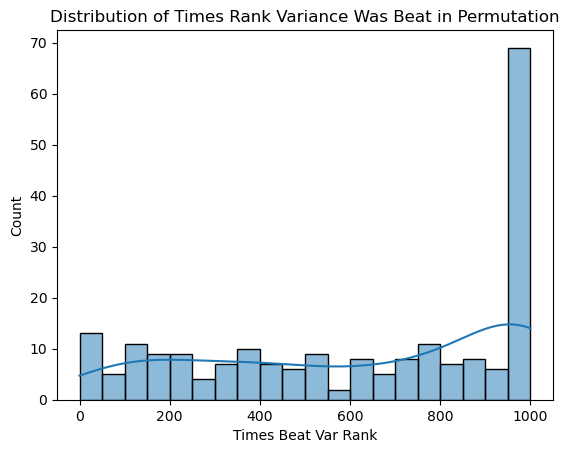

In [103]:
sns.histplot(x['Times Beat Var Rank'],binwidth=50,kde=True)
plt.title('Distribution of Times Rank Variance Was Beat in Permutation')
plt.show()

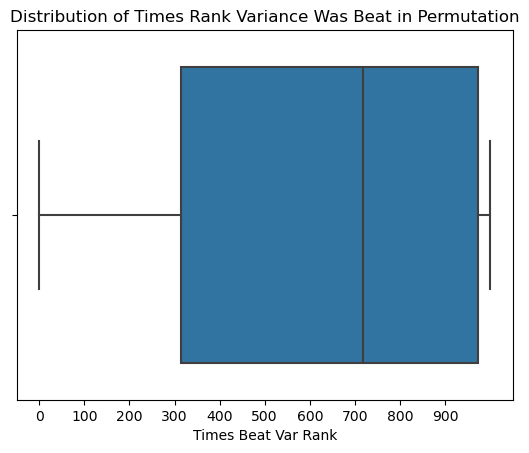

In [110]:
sns.boxplot(data=x,x='Times Beat Var Rank')
plt.xticks(range(0,1000,100))
plt.title('Distribution of Times Rank Variance Was Beat in Permutation')
plt.show()

In [122]:
len(x[x['Times Beat Var Rank']<=43])/len(x)

0.04672897196261682

In [124]:
x[x['Times Beat Var Rank']<=43].sort_values(by='Times Beat Var Rank',ascending=True)

,Representative,Times Beat Var Rank
68,Nicholas Van Taylor,0
120,John Hickenlooper,13
182,Dan Newhouse,17
2,William R. Keating,22
112,Josh Gottheimer,25
181,Dan Sullivan,25
21,Thomas H. Kean,29
184,Cindy Axne,33
73,Mr. Peter Meijer,35
114,Jonathan Jackson,40


In [135]:
congress.head(10)

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,...,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End,Variance
0,2018-05-15,2018-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-3003.0,-45000.0,-24001.5,-305.752120,-20.403858,294.684185
1,2018-06-13,2018-06-01,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-4004.0,-60000.0,-32002.0,-319.559072,-21.325242,349.939538
2,2018-09-14,2018-09-06,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-5005.0,-75000.0,-40002.5,-299.494566,-19.986271,331.180570
3,2019-03-06,2019-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-7007.0,-105000.0,-56003.5,-341.869433,-22.814087,248.649209
4,2019-06-14,2019-06-03,VMC,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,...,250001.0,500000.0,250001.0,500000.0,241993.0,380000.0,310996.5,4052.019634,2026.017921,2654.537278
5,2019-06-14,2019-06-03,IR,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,...,250001.0,500000.0,250001.0,500000.0,491994.0,880000.0,685997.0,14854.377868,7427.218643,160.975729
6,2019-12-12,2019-12-04,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,489992.0,850000.0,669996.0,-310.784142,-20.739662,341.887364
7,2020-03-11,2020-03-04,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,488991.0,835000.0,661995.5,-395.446238,-26.389446,101.768397
8,2020-06-23,2020-06-03,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,487990.0,820000.0,653995.0,-556.553995,-37.140703,87.696698
9,2020-09-11,2020-09-02,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,486989.0,805000.0,645994.5,-650.374016,-43.401626,82.175237


In [147]:
#congress.sort_values(by='Variance',ascending=False).head(10)
congress.groupby('Representative')['Variance'].mean().sort_values(ascending=False).head(10)

Representative
Nicholas Van Taylor    69596.461912
Dan Newhouse           44844.292209
Thomas H. Kean         35945.013122
William R. Keating     35699.632310
John Hickenlooper      27242.144148
Jonathan Jackson       26685.597423
Dan Sullivan           23563.385486
Cindy Axne             22521.668235
Kathy Manning          21904.032338
Peter Meijer           17864.045550
Name: Variance, dtype: float64